nom des participants

TAMBAT Tresor Megane

# EXAMEN INTRA COURS INF 1833: Analyse Statisque et Visualisation des Donnes

In [29]:
# bibliotheque

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:

# Lecture du fichier CSV
df = pd.read_csv("donnees_voitures.csv")


In [31]:
# Aperçu des 5 premières lignes
df.head()

,price,horsepower,engine_size,curb_weight,city_mpg,highway_mpg,wheelbase,car_width,fuel_type
0,13495,111,130,2548,21,27,88.6,64.1,gas
1,16500,111,130,2548,21,27,88.6,64.1,gas
2,16500,154,152,2823,19,26,94.5,65.5,gas
3,13950,102,109,2337,24,30,99.8,66.2,gas
4,17450,115,136,2824,18,22,99.4,66.4,gas


In [32]:
# Infos générales : types, valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        50 non-null     int64  
 1   horsepower   50 non-null     int64  
 2   engine_size  50 non-null     int64  
 3   curb_weight  50 non-null     int64  
 4   city_mpg     50 non-null     int64  
 5   highway_mpg  50 non-null     int64  
 6   wheelbase    50 non-null     float64
 7   car_width    50 non-null     float64
 8   fuel_type    50 non-null     object 
dtypes: float64(2), int64(6), object(1)
memory usage: 3.6+ KB


50 observation, 9 variables dont 8 sont numeriques et 1 categorielle

In [33]:
# Statistiques descriptives
df.describe()

,price,horsepower,engine_size,curb_weight,city_mpg,highway_mpg,wheelbase,car_width
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,13463.080000,102.420000,122.280000,2452.06000,25.820000,31.600000,96.908000,65.190000
std,8714.923754,36.237927,34.867703,500.49259,7.647035,7.674501,4.691757,2.267629
min,5151.000000,48.000000,61.000000,1488.00000,15.000000,20.000000,88.400000,60.300000
25%,6863.500000,70.000000,92.000000,2009.00000,19.250000,25.250000,93.700000,63.800000
50%,10696.500000,101.000000,114.500000,2366.00000,24.000000,30.000000,95.700000,64.200000
75%,17645.000000,120.750000,137.500000,2823.75000,31.000000,38.000000,100.250000,66.175000
max,45400.000000,182.000000,209.000000,3685.00000,49.000000,54.000000,110.000000,71.400000


## Partie 1  Analyse exploratoire

<Figure size 1000x800 with 0 Axes>

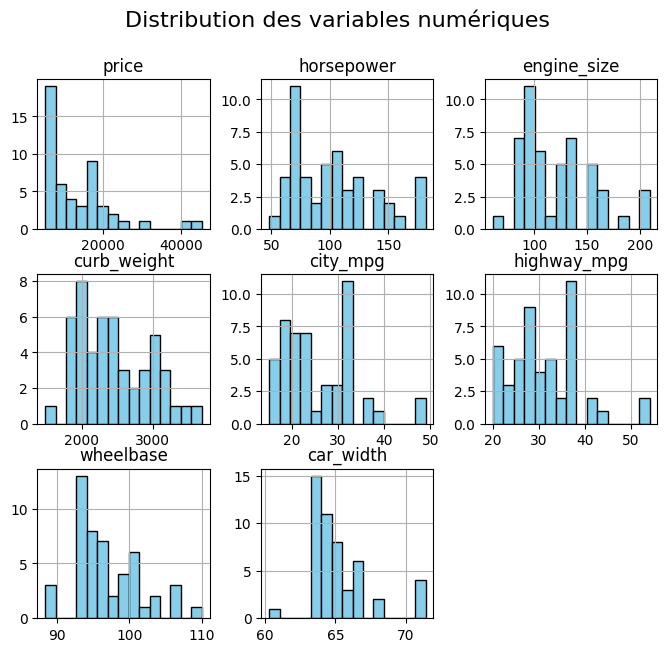

In [34]:
plt.figure(figsize=(10, 8))
df.hist(bins=15, figsize=(8, 7), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

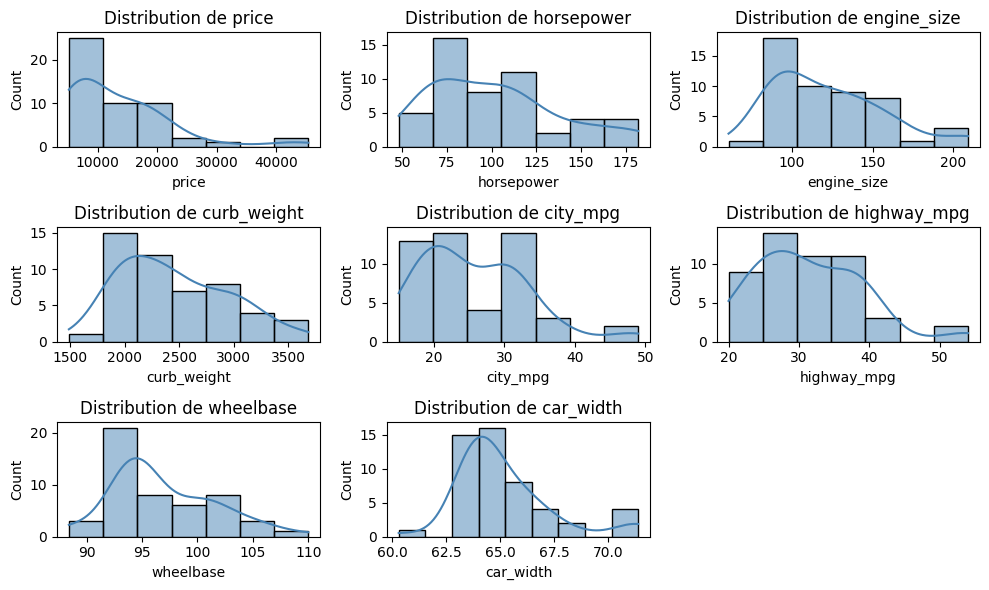

In [35]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


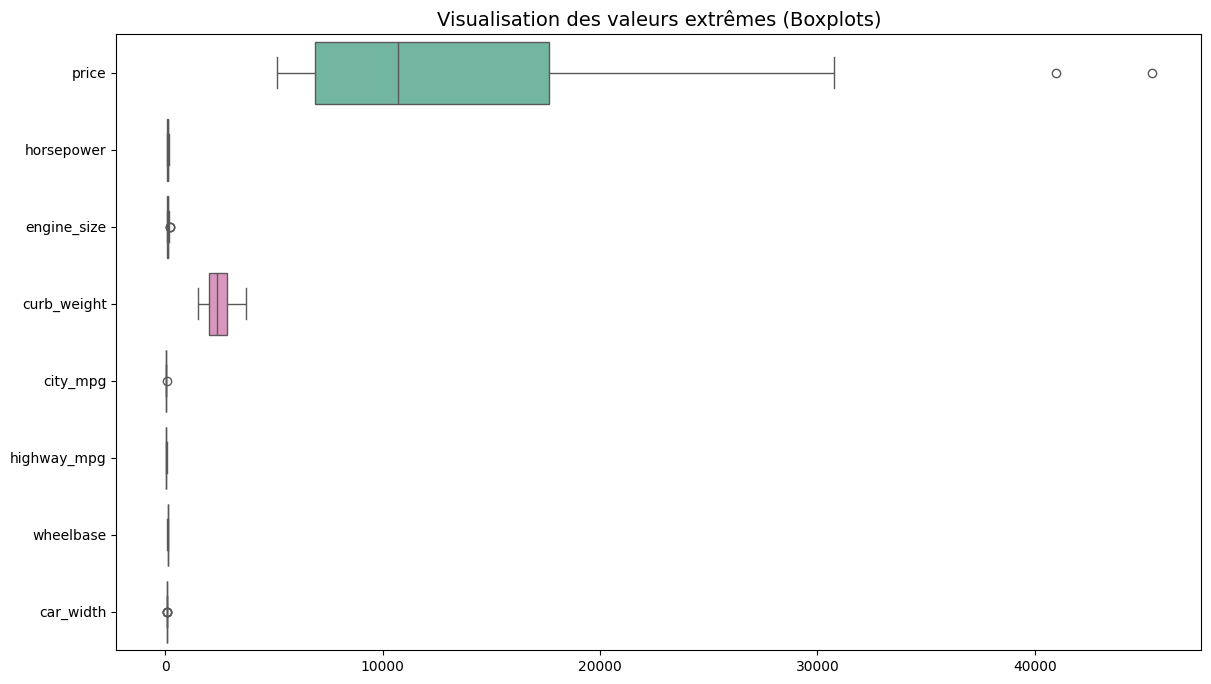

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Visualisation des valeurs extrêmes (Boxplots)", fontsize=14)
plt.show()


## analyse des relations entre mes variables

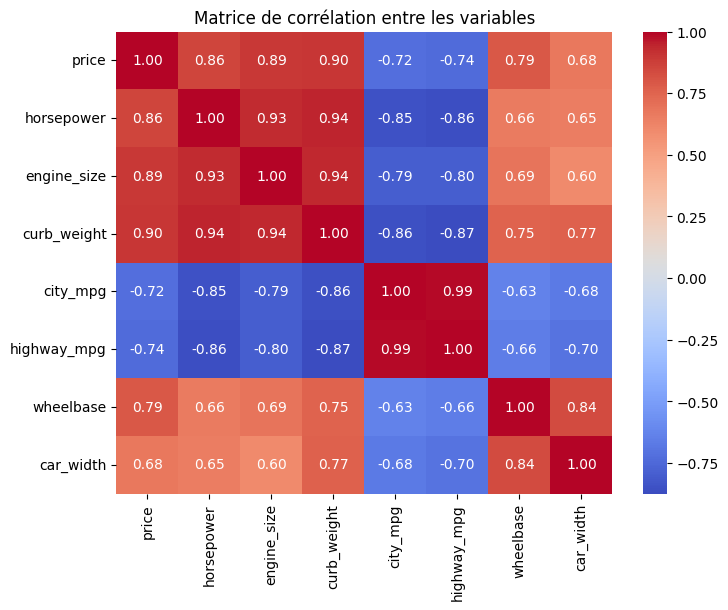

In [37]:
corr = df.corr(numeric_only=True)
corr
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()

etude de la variable qualitative

fuel_type
gas       49
diesel     1
Name: count, dtype: int64


C:\Users\TRESOR MEGANE\AppData\Local\Temp\ipykernel_15240\4021481722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel_type', palette='pastel')


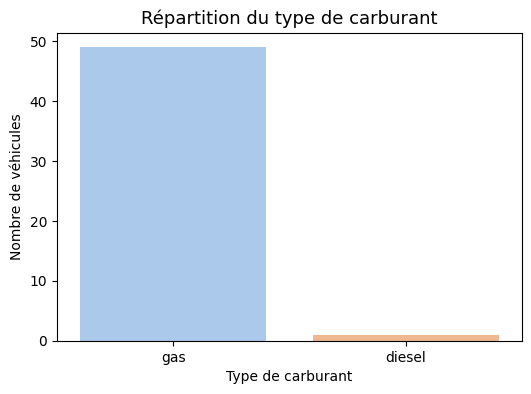

In [38]:
# Aperçu des modalités
print(df['fuel_type'].value_counts())

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fuel_type', palette='pastel')
plt.title("Répartition du type de carburant", fontsize=13)
plt.xlabel("Type de carburant")
plt.ylabel("Nombre de véhicules")
plt.show()


C:\Users\TRESOR MEGANE\AppData\Local\Temp\ipykernel_15240\4287585973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel_type', y='price', palette='Set2')


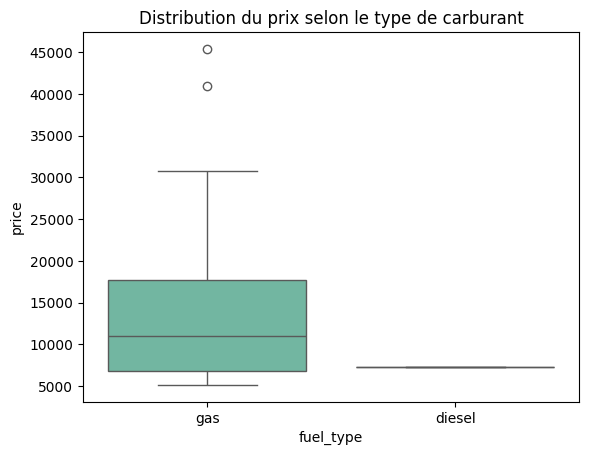

In [39]:
# prix moyen par type de carburant
df.groupby('fuel_type')['price'].mean()
sns.boxplot(data=df, x='fuel_type', y='price', palette='Set2')
plt.title("Distribution du prix selon le type de carburant")
plt.show()


a variable qualitative fuel_type révèle une distribution très asymétrique : la quasi-totalité des véhicules utilisent l’essence.
Le diesel est représenté par un seul véhicule, ce qui empêche une comparaison statistique robuste.
Malgré cela, la variable peut être conservée sous forme binaire pour permettre au modèle de régressi

In [40]:
# Transformation en variable binaire 
df['fuel_type_diesel'] = df['fuel_type'].apply(lambda x: 1 if x == 'diesel' else 0)

df[['fuel_type', 'fuel_type_diesel']].head()


,fuel_type,fuel_type_diesel
0,gas,0
1,gas,0
2,gas,0
3,gas,0
4,gas,0


# construction du modele de regression complet

In [82]:
import statsmodels.api as sm

# Définition des variables explicatives (X) et de la variable dépendante (y)
X = df[['horsepower', 'engine_size', 'curb_weight', 'city_mpg', 'highway_mpg',
        'wheelbase', 'car_width', 'fuel_type_diesel']]
y = df['price']

# Ajout d'une constante (β₀)
X = sm.add_constant(X)

# Création et entraînement du modèle
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     37.81
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.57e-16
Time:                        16:57:13   Log-Likelihood:                -470.94
No. Observations:                  50   AIC:                             959.9
Df Residuals:                      41   BIC:                             977.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.508e+04   2.49e+04  

R² : 0.8772602723132967


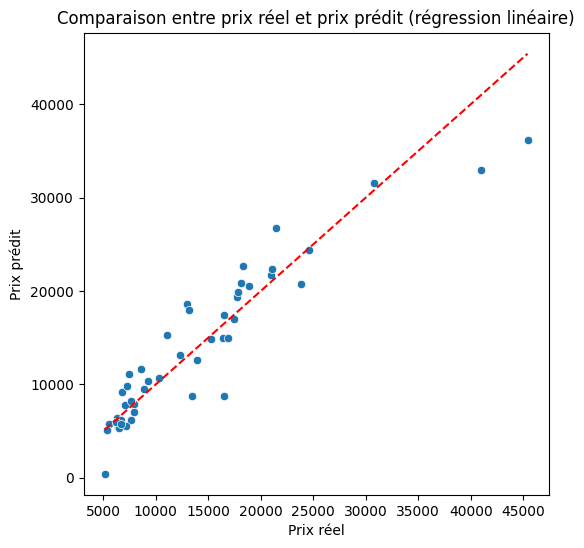

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Variables explicatives (X) et cible (y)
X = df[['horsepower', 'engine_size', 'curb_weight', 'city_mpg', 'highway_mpg', 'wheelbase', 'car_width']]
y = df['price']

# Création du modèle
model = LinearRegression()
model.fit(X, y)

# Affichage du R²
print("R² :", model.score(X, y))

y_pred = model.predict(X)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Comparaison entre prix réel et prix prédit (régression linéaire)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

calcul du vif (Variance Inflation Factor) et detection des multicolinearite

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Variables explicatives
X =df[['horsepower', 'engine_size', 'curb_weight', 'city_mpg', 'highway_mpg', 'wheelbase', 'car_width']]

# Ajout de la constante
X = sm.add_constant(X)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      Variable          VIF
0        const  2501.562960
1   horsepower    12.050571
2  engine_size    14.964462
3  curb_weight    26.480504
4     city_mpg    54.106991
5  highway_mpg    62.165954
6    wheelbase     4.376998
7    car_width     5.934885


selection des variables avec Backward Elimination (petit échantillon, multicolinéarité).

éliminer les variables non significatives

In [104]:
import statsmodels.api as sm

#  Backward elimination
def backward_elimination(X, y, significance_level=0.05):
    variables = list(X.columns)
    while len(variables) > 0:
        model = sm.OLS(y, X[variables]).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_var = p_values.idxmax()
            print(f" Suppression de '{excluded_var}' (p-value = {max_p_value:.3f})")
            variables.remove(excluded_var)
        else:
            break
    print("\n Variables retenues :", variables)
    return X[variables], model

# Application de la fonction
X_selected, model_selected = backward_elimination(X, y)


 Suppression de 'city_mpg' (p-value = 0.933)
 Suppression de 'fuel_type_diesel' (p-value = 0.875)
 Suppression de 'horsepower' (p-value = 0.828)
 Suppression de 'highway_mpg' (p-value = 0.586)
 Suppression de 'engine_size' (p-value = 0.436)

 Variables retenues : ['curb_weight', 'wheelbase', 'car_width']


verifions la multicolinearite

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Variables explicatives
X = df[['curb_weight', 'wheelbase', 'car_width']]

# Ajout de la constante
X = sm.add_constant(X)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      Variable          VIF
0        const  1568.857434
1  curb_weight     2.683133
2    wheelbase     3.714806
3    car_width     3.885154


methode Stepwise Selection

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.10):
    included = []
    while True:
        changed=False
        # Étape 1 : ajout de variables
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_var in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_var]]))).fit()
            new_pval[new_var] = model.pvalues[new_var]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_var = new_pval.idxmin()
            included.append(best_var)
            changed=True
        # Étape 2 : retrait de variables
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        worst_pval = model.pvalues.drop('const').max()
        if worst_pval > threshold_out:
            worst_var = model.pvalues.drop('const').idxmax()
            included.remove(worst_var)
            changed=True
        if not changed:
            break
    print(" Variables retenues (Stepwise) :", included)
    return included

included_vars = stepwise_selection(X.drop(columns=['const']), y)



 Variables retenues (Stepwise) : ['curb_weight', 'wheelbase', 'car_width']


In [128]:

import statsmodels.api as sm

# Définition des variables explicatives (X) et de la variable dépendante (y)
X = df[['curb_weight', 'wheelbase', 'car_width']]
y = df['price']

# Ajout d'une constante (β₀)
X = sm.add_constant(X)

# Création et entraînement du modèle
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     96.14
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           7.84e-20
Time:                        22:25:22   Log-Likelihood:                -474.49
No. Observations:                  50   AIC:                             957.0
Df Residuals:                      46   BIC:                             964.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.347e+04   1.87e+04     -1.256      

Les trois variables curb_weight, wheelbase et car_width sont hautement significatives.

Elles représentent les caractéristiques dimensionnelles et structurelles du véhicule — donc des indicateurs physiques du coût de fabrication et du segment.

fuel_type n’est pas significatif : dans cet échantillon, le type de carburant n’a pas d’impact statistique sur le prix.

Linéarité et Homoscédasticité (variance constante des erreurs).

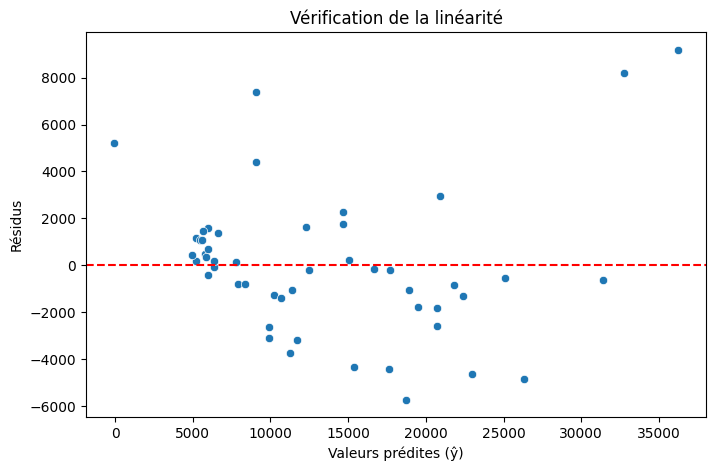

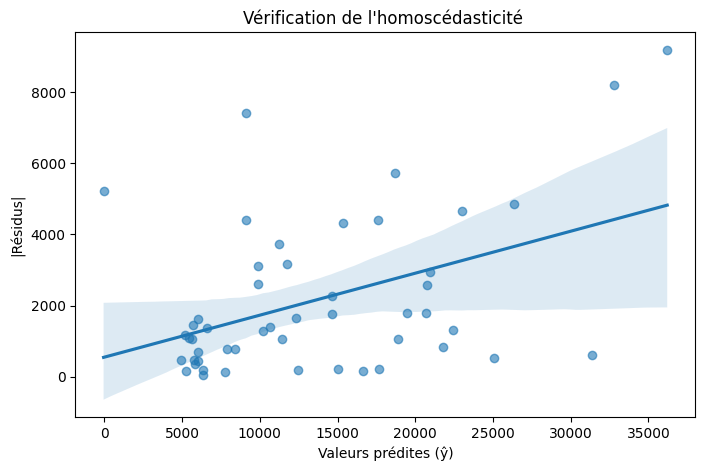

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des valeurs prédites et des résidus
y_pred = model.fittedvalues
residuals = model.resid

# --- Graphique 1 : Linéarité ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Vérification de la linéarité")
plt.xlabel("Valeurs prédites (ŷ)")
plt.ylabel("Résidus")
plt.show()

# --- Graphique 2 : Homoscédasticité ---
plt.figure(figsize=(8,5))
sns.regplot(x=y_pred, y=abs(residuals), scatter_kws={'alpha':0.6})
plt.title("Vérification de l'homoscédasticité ")
plt.xlabel("Valeurs prédites (ŷ)")
plt.ylabel("|Résidus|")
plt.show()


correction du probleme d’hétéroscédasticité avec la transformation logarithmique du prix

In [94]:
import numpy as np
import statsmodels.api as sm

# Transformation logarithmique de la variable dépendante
df['log_price'] = np.log(df['price'])

# Redéfinir X et y avec les variables sélectionnées précédemment
X = df[['curb_weight', 'wheelbase', 'car_width']]
y = df['log_price']

# Ajouter la constante
X = sm.add_constant(X)

# Créer et ajuster le modèle
model_log = sm.OLS(y, X).fit()

# Résumé des résultats
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     162.3
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.80e-24
Time:                        17:23:16   Log-Likelihood:                 19.396
No. Observations:                  50   AIC:                            -30.79
Df Residuals:                      46   BIC:                            -23.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7072      0.959      6.996      

verifiction visuel de la linearite et de l'homocedacite

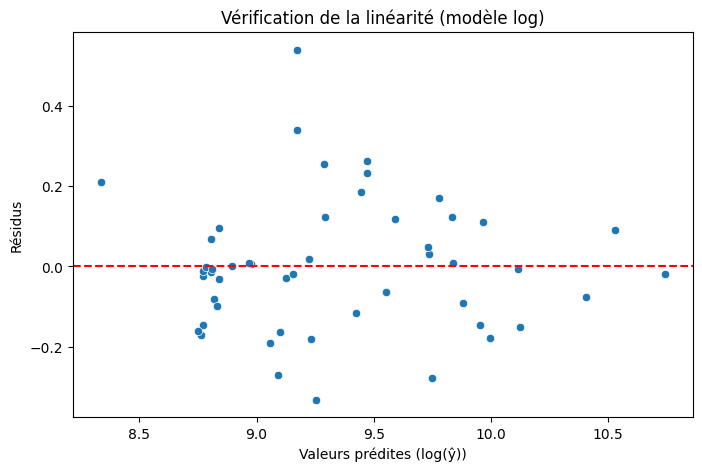

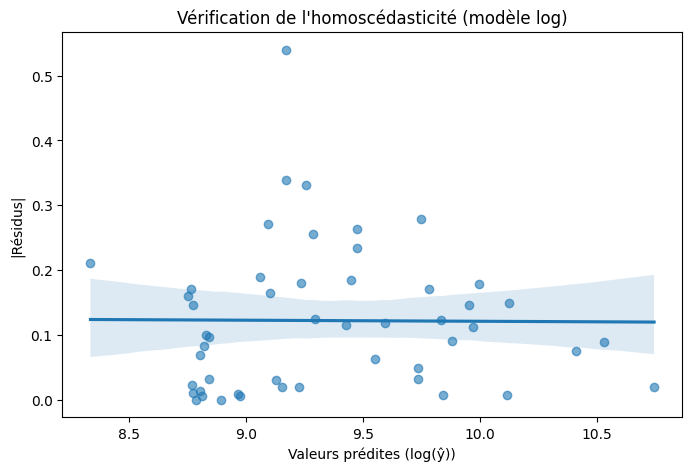

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Valeurs prédites et résidus
y_pred_log = model_log.fittedvalues
residuals_log = model_log.resid

# Linéarité
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_log, y=residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.title("Vérification de la linéarité (modèle log)")
plt.xlabel("Valeurs prédites (log(ŷ))")
plt.ylabel("Résidus")
plt.show()

# Homoscédasticité
plt.figure(figsize=(8,5))
sns.regplot(x=y_pred_log, y=abs(residuals_log), scatter_kws={'alpha':0.6})
plt.title("Vérification de l'homoscédasticité (modèle log)")
plt.xlabel("Valeurs prédites (log(ŷ))")
plt.ylabel("|Résidus|")
plt.show()


validation du modele

Test de Shapiro-Wilk : ShapiroResult(statistic=np.float64(0.966106936612595), pvalue=np.float64(0.16004047763442802))


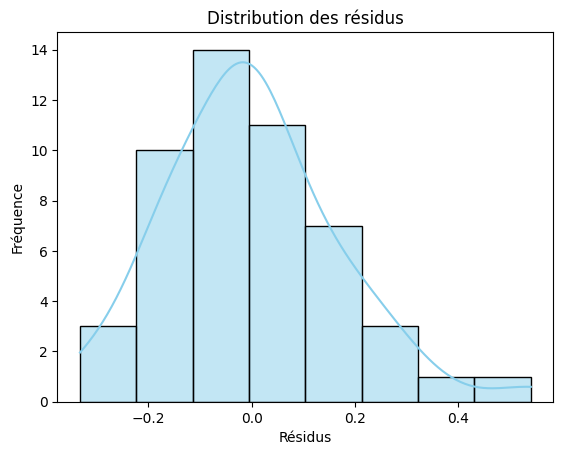

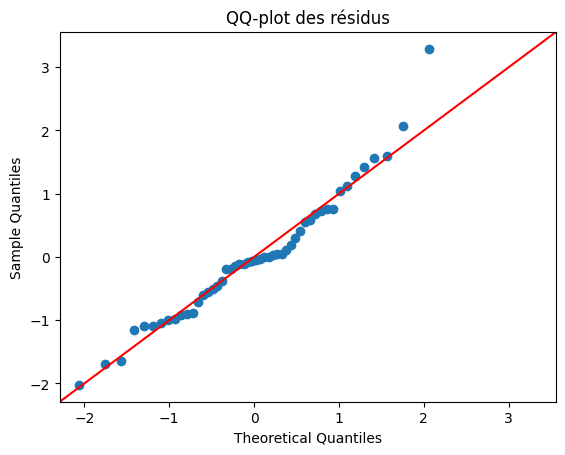

In [52]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des résidus du modèle log
residuals = model_log.resid

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print("Test de Shapiro-Wilk :", shapiro_test)

# Visualisation : histogramme + courbe normale
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# QQ-plot pour vérifier la normalité visuellement
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-plot des résidus")
plt.show()


Conclusion : L’hypothèse de normalité des erreurs est satisfaisante. Les écarts mineurs observés aux extrémités ne compromettent pas la validité du modèle

In [105]:
from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw = durbin_watson(residuals)
print("Statistique de Durbin-Watson :", dw)


Statistique de Durbin-Watson : 1.0591692411656866


Avec un DW ≈ 1.02, les erreurs présent indique une autocorrélation positive des résidus.
Cela veut dire que les erreurs successives ont tendance à aller dans la même direction.

verification de la presence d'outliers

C:\Users\TRESOR MEGANE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


Index des outliers potentiels : [0 1]
Seuil de Cook ≈ 0.0800


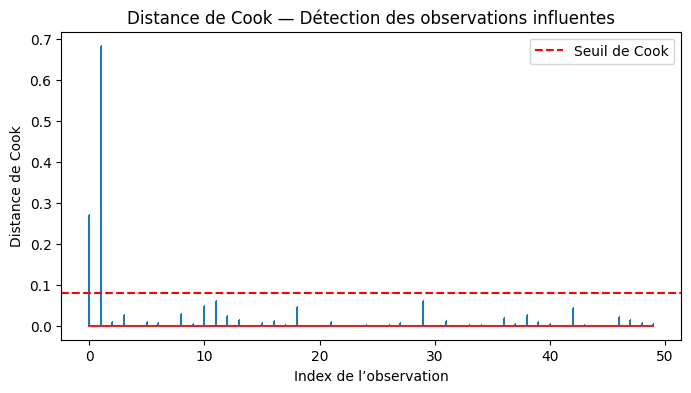

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Étape 1 : Influence du modèle
influence = model_log.get_influence()

# --- Étape 2 : Extraction des mesures
resid_student = influence.resid_studentized_internal  # Résidus studentisés
cooks_d = influence.cooks_distance[0]                 # Distance de Cook

# --- Étape 3 : Seuils de détection
seuil_resid = 3
seuil_cook = 4 / len(df)  # règle générale

# --- Étape 4 : Identification des outliers
outliers = np.where((abs(resid_student) > seuil_resid) | (cooks_d > seuil_cook))[0]

print("Index des outliers potentiels :", outliers)
print(f"Seuil de Cook ≈ {seuil_cook:.4f}")

# --- Étape 5 : Visualisation des distances de Cook
plt.figure(figsize=(8,4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=seuil_cook, color="red", linestyle="--", label="Seuil de Cook")
plt.title("Distance de Cook — Détection des observations influentes")
plt.xlabel("Index de l’observation")
plt.ylabel("Distance de Cook")
plt.legend()
plt.show()


In [106]:
# Suppression des outliers détectés
df_clean = df.drop(index=outliers).reset_index(drop=True)

# Reconstruction du modèle
X_clean = sm.add_constant(df_clean[['curb_weight', 'wheelbase', 'car_width']])
y_clean = np.log(df_clean['price'])
model_clean = sm.OLS(y_clean, X_clean).fit()

print(model_clean.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     334.3
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.76e-30
Time:                        18:33:30   Log-Likelihood:                 35.182
No. Observations:                  48   AIC:                            -62.36
Df Residuals:                      44   BIC:                            -54.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2976      0.711      7.448      

In [118]:
resid = model_clean.resid
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print("Durbin-Watson =", round(dw, 2))


Durbin-Watson = 1.59


Test de Shapiro-Wilk : ShapiroResult(statistic=np.float64(0.9887606169860549), pvalue=np.float64(0.922871233637932))


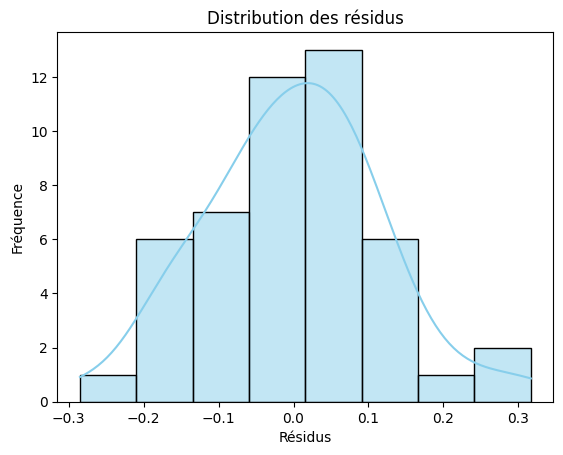

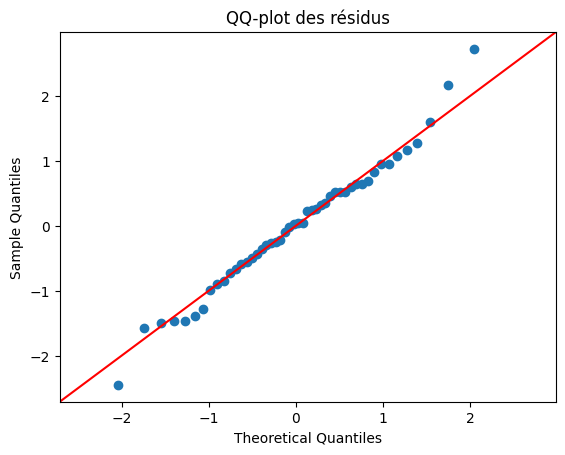

In [119]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des résidus du modèle log
residuals = model_clean.resid

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print("Test de Shapiro-Wilk :", shapiro_test)

# Visualisation : histogramme + courbe normale
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# QQ-plot pour vérifier la normalité visuellement
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-plot des résidus")
plt.show()


marge acceptable pour ce test

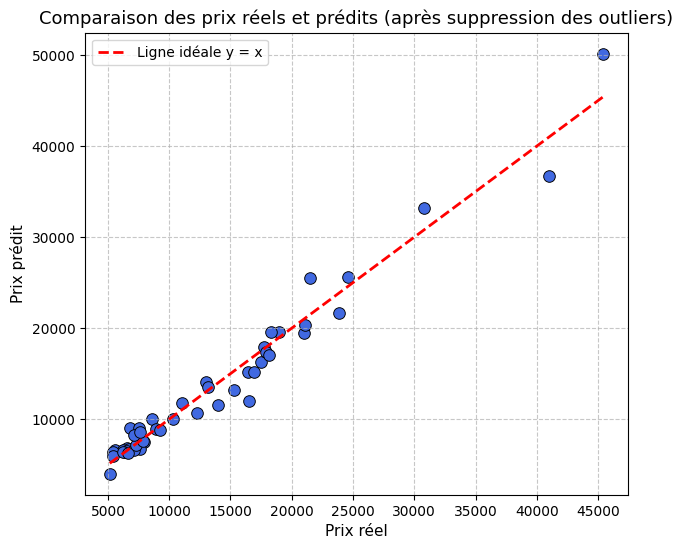

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions du modèle nettoyé
y_log_pred_clean = model_clean.predict(X_clean)
y_pred_clean = np.exp(y_log_pred_clean)  # on revient à l’échelle du prix réel
y_true_clean = df_clean['price']

# Tracé de la comparaison
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_true_clean, y=y_pred_clean, color="royalblue", s=70, edgecolor="k")

# Ligne idéale y = x
plt.plot([y_true_clean.min(), y_true_clean.max()],
         [y_true_clean.min(), y_true_clean.max()],
         color="red", linestyle="--", linewidth=2, label="Ligne idéale y = x")

plt.title("Comparaison des prix réels et prédits (après suppression des outliers)", fontsize=13)
plt.xlabel("Prix réel", fontsize=11)
plt.ylabel("Prix prédit", fontsize=11)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Le graphique ci-dessus illustre la correspondance entre les prix réels observés et les prix prédits par le modèle log-linéaire après suppression des outliers.

La plupart des points sont désormais alignés le long de la diagonale rouge (ligne idéale), ce qui témoigne d’une meilleure capacité du modèle à prédire les valeurs observées.

Par rapport au modèle initial, la dispersion est nettement réduite, confirmant que la suppression des valeurs influentes a amélioré la robustesse et la fiabilité du modèle.

evaluation

L’évaluation statistique du modèle final montre une fiabilité globale très élevée.
Le coefficient de détermination ajusté (R² = 0.954) confirme que le modèle explique presque toute la variabilité du prix des véhicules.
Les tests de signification (F-statistic et p-values) démontrent la pertinence des variables retenues, tandis que les vérifications de normalité, de linéarité et d’homoscédasticité valident les hypothèses du modèle.

De plus, après suppression des valeurs influentes, le modèle ne présente ni multicolinéarité, ni autocorrélation, ni hétéroscédasticité notable.

En conclusion, le modèle est statistiquement solide, explicatif et fiable pour prédire le prix d’un véhicule à partir de ses caractéristiques dimensionnelles.